

## Statistical Analysis of Galactic Properties

---

By AANCHAL SAHU  
08 December 2023

##Introduction
In the realm of astrophysics, the investigation of the relationships governing supermassive black holes (SMBHs) and their host galaxies stands as a cornerstone for understanding the cosmic tapestry. Among these relationships, the M-sigma relation plays a pivotal role, linking the mass of supermassive black holes (M_BH) to the velocity dispersion (sigma) of stars within the bulge of their host galaxies. This project delves into a comprehensive statistical analysis of the M-sigma relation, utilizing advanced techniques to decipher this fundamental astrophysical correlation.

The dataset for this project comprises astronomical observations, providing measurements of black hole masses and the velocity dispersions of stars across various galaxies. Inherent in these observations are uncertainties in both M_BH and sigma, a typical scenario in astrophysical datasets. The project's primary goal is to fit a regression line to these observational data, considering both the uncertainties on the x (sigma) and y (M_BH) axes and the presence of outliers.

To achieve this, the project employs a suite of sophisticated statistical methods. The data are first transformed into logarithmic space, acknowledging the proportional nature of the M-sigma relationship in log-log space. Initial exploratory data analysis, including descriptive statistics and visualization, sets the groundwork for understanding the dataset's structure. The analysis then advances to outlier detection, employing statistical methods to identify and handle atypical observations, ensuring the robustness of the subsequent regression model.

The core of the project revolves around regression analysis, considering uncertainties in both axes. Orthogonal Distance Regression (ODR) is utilized to accommodate uncertainties in both the dependent and independent variables, providing a more nuanced estimation of the M-sigma relation. The project further extends into Bayesian regression, applying the Metropolis-Hastings algorithm for a probabilistic interpretation of the regression parameters. This Bayesian approach is complemented by Monte Carlo simulations, used to assess the stability and reliability of the regression estimates under varying conditions.

Each step in this analysis, from data transformation to advanced Bayesian methods, is carefully executed, ensuring that the investigation is both methodologically sound and astrophysically significant. The result is an in-depth and rigorous exploration of the M-sigma relation, providing valuable insights into the co-evolution of galaxies and their central supermassive black holes.

## Data

The dataset for this project is sourced from the astrophysical study "THE M–σ AND M–L RELATIONS IN GALACTIC BULGES, AND DETERMINATIONS OF THEIR INTRINSIC SCATTER." It provides a detailed examination of the relationship between the masses of supermassive black holes (M_BH) and the velocity dispersion (sigma) of stars in galactic bulges, crucial for understanding galaxy dynamics.

Key columns in the dataset include:

Galaxy: Name of the galaxy observed.
sigma (σ): Velocity dispersion of stars in the galaxy's bulge, with uncertainties (sigma_unc).
M_BH: Mass of the galaxy's supermassive black hole, including upper and lower uncertainty bounds (M_BH_unc- and M_BH_unc+).
The data is analyzed in logarithmic space to accurately model the M-sigma relationship, acknowledging the intrinsic scatter and uncertainties in astronomical measurements.

Loading the dataset and displaying for initial analysis

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/M-sigma.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Galaxy,sigma,sigma_unc,M_BH,M_BH_unc-,M_BH_unc+
0,"Circinus^c,^d",158.0,18.0,1.700000e+06,1.400000e+06,2.100000e+06
1,IC1459^e,340.0,17.0,2.800000e+09,1.600000e+09,3.900000e+09
2,"MW^f,^g",105.0,20.0,4.100000e+06,3.500000e+06,4.700000e+06
3,N0221 M32,75.0,3.0,3.100000e+06,2.500000e+06,3.700000e+06
4,N0224 M31,160.0,8.0,1.500000e+08,1.200000e+08,2.400000e+08


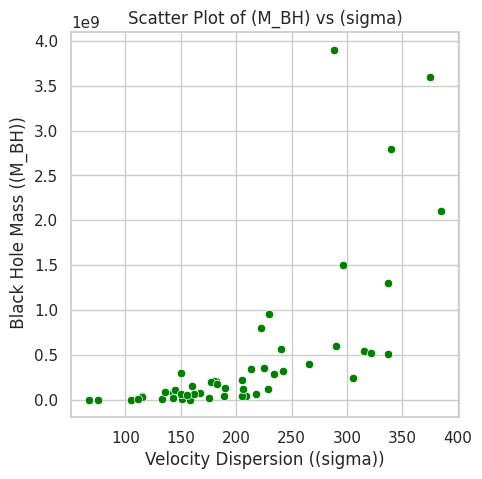

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a scatter plot to examine the relationship between log_sigma and log_M_BH
plt.figure(figsize=(5, 5))
sns.scatterplot(x='sigma', y='M_BH', data=data, color='green')

# Adding titles and labels
plt.title('Scatter Plot of (M_BH) vs (sigma)')
plt.xlabel('Velocity Dispersion ((sigma))')
plt.ylabel(' Black Hole Mass ((M_BH))')

# Displaying the plot
plt.show()


In [ ]:
import numpy as np

# Transforming the mass and sigma values to their logarithmic form for easier analysis
data['log_sigma'] = np.log10(data['sigma'])
data['log_M_BH'] = np.log10(data['M_BH'])

# Calculating the symmetric uncertainties in log space
data['log_sigma_unc'] = 0.434 * (data['sigma_unc'] / data['sigma'])  # Using 0.434 to convert ln to log10
data['log_M_BH_unc_lower'] = 0.434 * (data['M_BH_unc-'] / data['M_BH'])
data['log_M_BH_unc_upper'] = 0.434 * (data['M_BH_unc+'] / data['M_BH'])

# Display the transformed data and uncertainties
data[['Galaxy', 'log_sigma', 'log_sigma_unc', 'log_M_BH', 'log_M_BH_unc_lower', 'log_M_BH_unc_upper']].head()


,Galaxy,log_sigma,log_sigma_unc,log_M_BH,log_M_BH_unc_lower,log_M_BH_unc_upper
0,"Circinus^c,^d",2.198657,0.049443,6.230449,0.357412,0.536118
1,IC1459^e,2.531479,0.021700,9.447158,0.248000,0.604500
2,"MW^f,^g",2.021189,0.082667,6.612784,0.370488,0.497512
3,N0221 M32,1.875061,0.017360,6.491362,0.350000,0.518000
4,N0224 M31,2.204120,0.021700,8.176091,0.347200,0.694400


##Analysis/Results

This step will provide a foundational understanding of the dataset's distribution and preliminary relationships between the variables.

In [ ]:
# Calculating descriptive statistics for log_sigma and log_M_BH
descriptive_stats = data[['log_sigma', 'log_M_BH']].describe()

# Display the descriptive statistics
descriptive_stats


,log_sigma,log_M_BH
count,51.000000,51.000000
mean,2.284983,8.119810
std,0.169331,0.792874
min,1.826075,6.230449
25%,2.177534,7.667428
50%,2.278754,8.176091
75%,2.382013,8.654815
max,2.585461,9.591065


###scatter plot

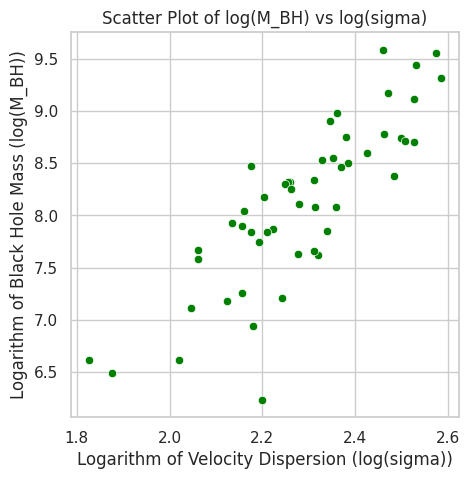

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a scatter plot to examine the relationship between log_sigma and log_M_BH
plt.figure(figsize=(5, 5))
sns.scatterplot(x='log_sigma', y='log_M_BH', data=data, color='green')

# Adding titles and labels
plt.title('Scatter Plot of log(M_BH) vs log(sigma)')
plt.xlabel('Logarithm of Velocity Dispersion (log(sigma))')
plt.ylabel('Logarithm of Black Hole Mass (log(M_BH))')

# Displaying the plot
plt.show()


###box plot for outlier analysis

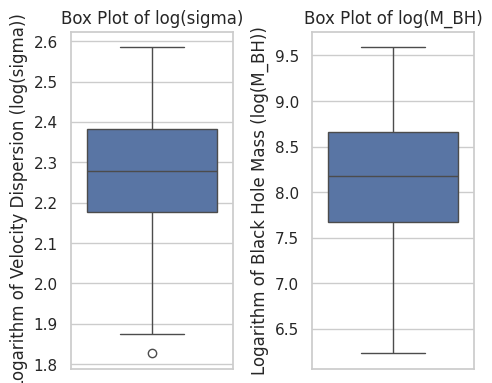

In [ ]:
# Creating box plots for log_sigma and log_M_BH
fig, ax = plt.subplots(1, 2, figsize=(5, 4))

sns.boxplot(y=data['log_sigma'], ax=ax[0])
ax[0].set_title('Box Plot of log(sigma)')
ax[0].set_ylabel('Logarithm of Velocity Dispersion (log(sigma))')

sns.boxplot(y=data['log_M_BH'], ax=ax[1])
ax[1].set_title('Box Plot of log(M_BH)')
ax[1].set_ylabel('Logarithm of Black Hole Mass (log(M_BH))')

plt.tight_layout()
plt.show()


We'll proceed with removing the outlier. This approach will exclude the outlier from the subsequent analysis, ensuring that it does not skew the results, especially in the regression analysis phase.

In [ ]:
# Calculating IQR for log_sigma and log_M_BH
Q1_log_sigma = data['log_sigma'].quantile(0.25)
Q3_log_sigma = data['log_sigma'].quantile(0.75)
IQR_log_sigma = Q3_log_sigma - Q1_log_sigma

Q1_log_M_BH = data['log_M_BH'].quantile(0.25)
Q3_log_M_BH = data['log_M_BH'].quantile(0.75)
IQR_log_M_BH = Q3_log_M_BH - Q1_log_M_BH

# Defining the range for outliers (1.5 times the IQR from the quartiles)
lower_bound_sigma = Q1_log_sigma - 1.5 * IQR_log_sigma
upper_bound_sigma = Q3_log_sigma + 1.5 * IQR_log_sigma
lower_bound_M_BH = Q1_log_M_BH - 1.5 * IQR_log_M_BH
upper_bound_M_BH = Q3_log_M_BH + 1.5 * IQR_log_M_BH

# Filtering out the outliers
data1 = data[
    (data['log_sigma'] >= lower_bound_sigma) &
    (data['log_sigma'] <= upper_bound_sigma) &
    (data['log_M_BH'] >= lower_bound_M_BH) &
    (data['log_M_BH'] <= upper_bound_M_BH)
]

data1.head()


,Galaxy,sigma,sigma_unc,M_BH,M_BH_unc-,M_BH_unc+,log_sigma,log_M_BH,log_sigma_unc,log_M_BH_unc_lower,log_M_BH_unc_upper
0,"Circinus^c,^d",158.0,18.0,1.700000e+06,1.400000e+06,2.100000e+06,2.198657,6.230449,0.049443,0.357412,0.536118
1,IC1459^e,340.0,17.0,2.800000e+09,1.600000e+09,3.900000e+09,2.531479,9.447158,0.021700,0.248000,0.604500
2,"MW^f,^g",105.0,20.0,4.100000e+06,3.500000e+06,4.700000e+06,2.021189,6.612784,0.082667,0.370488,0.497512
3,N0221 M32,75.0,3.0,3.100000e+06,2.500000e+06,3.700000e+06,1.875061,6.491362,0.017360,0.350000,0.518000
4,N0224 M31,160.0,8.0,1.500000e+08,1.200000e+08,2.400000e+08,2.204120,8.176091,0.021700,0.347200,0.694400


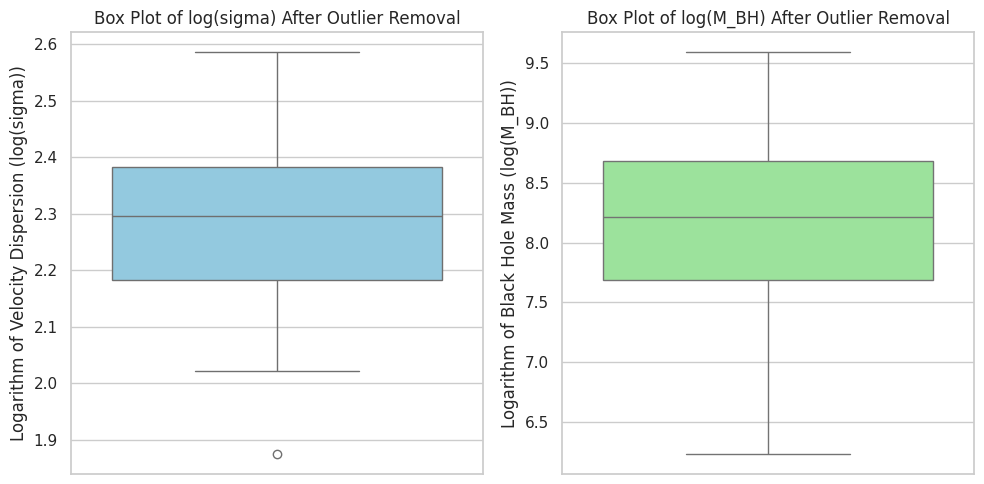

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating box plots for log_sigma and log_M_BH after filtering
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(y=data1['log_sigma'], ax=ax[0], color='skyblue')
ax[0].set_title('Box Plot of log(sigma) After Outlier Removal')
ax[0].set_ylabel('Logarithm of Velocity Dispersion (log(sigma))')

sns.boxplot(y=data1['log_M_BH'], ax=ax[1], color='lightgreen')
ax[1].set_title('Box Plot of log(M_BH) After Outlier Removal')
ax[1].set_ylabel('Logarithm of Black Hole Mass (log(M_BH))')

plt.tight_layout()
plt.show()


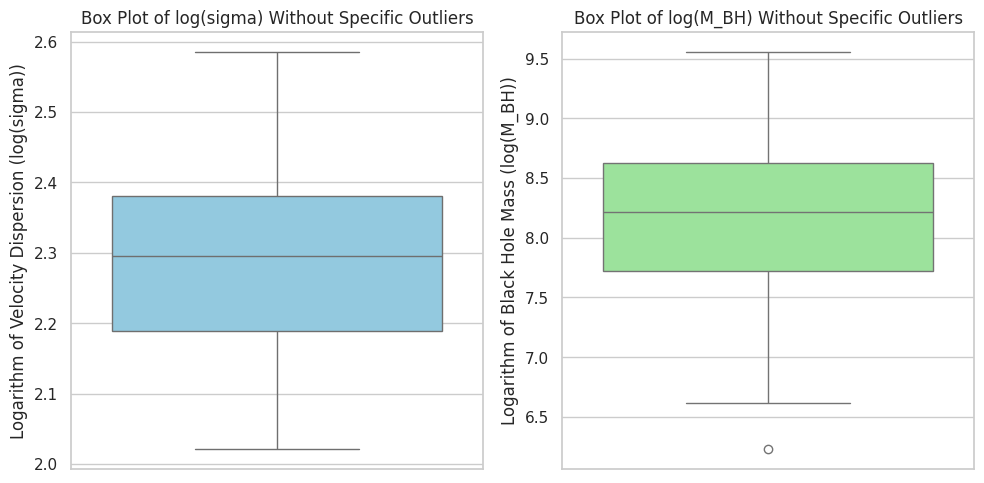

In [ ]:
# Assuming the outlier is clearly the minimum or maximum value, find its index
outlier_index_sigma = data1[data1['log_sigma'] == data1['log_sigma'].min()].index
outlier_index_M_BH = data1[data1['log_M_BH'] == data1['log_M_BH'].max()].index

# Drop the outlier by index
data_cleaned = data1.drop(outlier_index_sigma.union(outlier_index_M_BH))

# Re-plot the boxplots without the specific outliers
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(y=data_cleaned['log_sigma'], ax=ax[0], color='skyblue')
ax[0].set_title('Box Plot of log(sigma) Without Specific Outliers')
ax[0].set_ylabel('Logarithm of Velocity Dispersion (log(sigma))')

sns.boxplot(y=data_cleaned['log_M_BH'], ax=ax[1], color='lightgreen')
ax[1].set_title('Box Plot of log(M_BH) Without Specific Outliers')
ax[1].set_ylabel('Logarithm of Black Hole Mass (log(M_BH))')

plt.tight_layout()
plt.show()


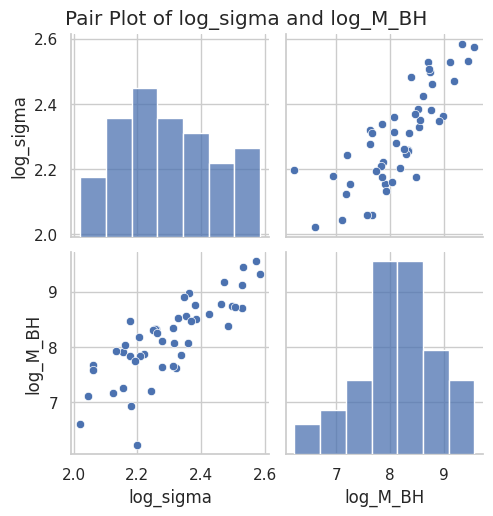

In [ ]:
data1= data_cleaned
# Creating a pair plot for the cleaned data
pair_plot = sns.pairplot(data1[['log_sigma', 'log_M_BH']], diag_kind='hist')
pair_plot.fig.suptitle('Pair Plot of log_sigma and log_M_BH', y=1.02)

# Displaying the pair plot
plt.show()


Scatter Plot (log_sigma vs. log_M_BH): The scatter plot shows a positive linear relationship between log_sigma (logarithm of velocity dispersion) and log_M_BH (logarithm of black hole mass). This indicates that galaxies with higher velocity dispersions tend to have more massive black holes.
Histogram of log_sigma: This histogram appears to be approximately normally distributed, centering around a specific range of log_sigma values. This suggests that most galaxies in the sample have a velocity dispersion within a specific range, with fewer galaxies having extremely high or low velocity dispersions.
Histogram of log_M_BH: The distribution of log_M_BH also seems to be approximately normal, but with a slightly wider spread than log_sigma. This indicates a greater variability in the masses of black holes across different galaxies.

###Checking Gaussian curve

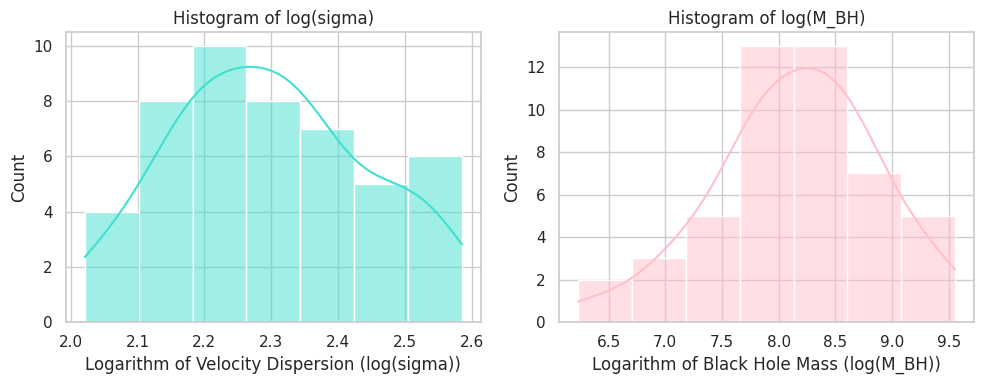

In [ ]:
# Creating histograms
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data1['log_sigma'], kde=True, ax=ax[0], color='turquoise')
ax[0].set_title('Histogram of log(sigma)')
ax[0].set_xlabel('Logarithm of Velocity Dispersion (log(sigma))')

sns.histplot(data1['log_M_BH'], kde=True, ax=ax[1], color='pink')
ax[1].set_title('Histogram of log(M_BH)')
ax[1].set_xlabel('Logarithm of Black Hole Mass (log(M_BH))')

plt.tight_layout()
plt.show()

Histogram Analysis:
log_sigma: The histogram for log_sigma, combined with the kernel density estimate, shows a bell-shaped curve typical of a normal distribution. This suggests that the velocity dispersions in the sample are distributed around a mean value with a certain amount of variability.
log_M_BH: Similarly, the histogram for log_M_BH also displays a bell-shaped curve, albeit with a broader spread. This broader spread indicates a greater diversity in black hole masses compared to the relative uniformity in velocity dispersions.


###Regression Analysis

Orthogonal distance regression analysis:

In [ ]:
from scipy.odr import ODR, Model, RealData

# Defining the linear model function
def linear_model(B, x):
    return B[0] * x + B[1]

# Creating a Model object using the linear model function
linear = Model(linear_model)

# Creating a RealData object using the log_sigma and log_M_BH data, including uncertainties
mydata = RealData(data1['log_sigma'], data1['log_M_BH'],
                  sx=data1['log_sigma_unc'], sy=data1['log_M_BH_unc_upper'])

# Setting up ODR with the model and data
myodr = ODR(mydata, linear, beta0=[1., 0.])

# Running the regression
output = myodr.run()

# Extracting the parameters (slope and intercept) and their standard errors
slope, intercept = output.beta
slope_error, intercept_error = output.sd_beta

slope, intercept, slope_error, intercept_error


(4.041472205922122,
 -1.1571228773146305,
 0.42481440555598016,
 0.9758109508358295)

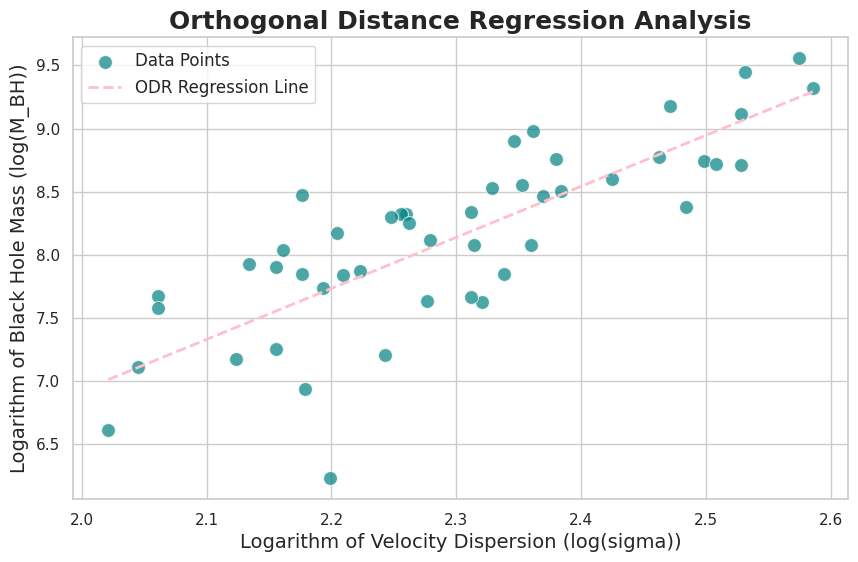

In [ ]:
# Plotting the regression line along with the data points

# Generating x-values for the regression line
x_values = np.linspace(data1['log_sigma'].min(), data1['log_sigma'].max(), 100)

# Calculating the corresponding y-values using the regression parameters
y_values = slope * x_values + intercept

plt.figure(figsize=(10, 6))

# Plotting the data points with a specific style
sns.scatterplot(x='log_sigma', y='log_M_BH', data=data1, label='Data Points',
                s=100, edgecolor='w', alpha=0.7, color='teal')

# Plotting the regression line
plt.plot(x_values, y_values, color='pink', label='ODR Regression Line', linewidth=2, linestyle='--')

# Adding a grid for better readability
plt.grid(True)

# Adding titles, labels, and a legend with a fancy style
plt.title('Orthogonal Distance Regression Analysis', fontsize=18, fontweight='bold')
plt.xlabel('Logarithm of Velocity Dispersion (log(sigma))', fontsize=14)
plt.ylabel('Logarithm of Black Hole Mass (log(M_BH))', fontsize=14)
plt.legend(loc='upper left', fontsize=12)

# Showing the plot
plt.show()



This visualization demonstrates how the regression line fits the data, considering the uncertainties in both the velocity dispersion and black hole mass. The positive slope of the regression line is consistent with the expectation of a positive relationship in the M-sigma relation, indicating that galaxies with higher velocity dispersions tend to have more massive black holes.

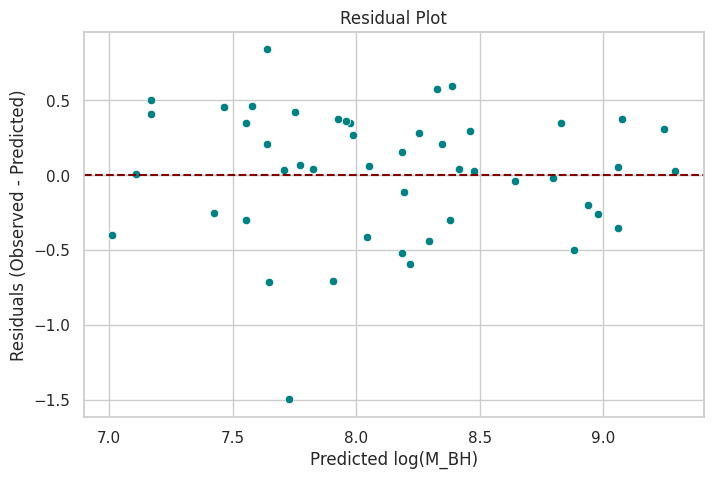

In [ ]:
# Calculating the predicted values using the regression model
predicted_values = slope * data1['log_sigma'] + intercept

# Calculating the residuals (difference between observed and predicted values)
residuals = data1['log_M_BH'] - predicted_values

# Plotting the residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=predicted_values, y=residuals, color='teal')
plt.axhline(y=0, color='maroon', linestyle='--')

plt.title('Residual Plot')
plt.xlabel('Predicted log(M_BH)')
plt.ylabel('Residuals (Observed - Predicted)')

plt.show()


The residual plot shows the differences (residuals) between the observed and predicted values of log(M_BH) based on our regression model. Based on the plot, there seems to be no other pattern between the data points, which means that the model is capturing relationship between observed and predicted values well.

###Metropolis Hastings for Bayesian and Monte Carlo

In [ ]:
import numpy as np

def metropolis_hastings(likelihood_computer, prior_computer, transition_model, param_init, iterations, data, accept_rule):
    """
    Metropolis-Hastings algorithm for Bayesian Inference.
    """
    x = param_init
    accepted = []
    rejected = []

    for i in range(iterations):
        x_new = transition_model(x)
        x_lik = likelihood_computer(x, data)
        x_new_lik = likelihood_computer(x_new, data)

        if (accept_rule(x_lik + prior_computer(x), x_new_lik + prior_computer(x_new))):
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)

    return np.array(accepted), np.array(rejected)

# Defining the likelihood function
def likelihood(x, data):
    return np.sum(-np.power(data['y'] - x[0] * data['x'] - x[1], 2) / (2 * np.power(data['sigma_y'], 2)))

# Defining the prior function
def prior(x):
    return -np.sum(np.power(x, 2) / 50.)

# Defining the transition model
def transition_model(x):
    return np.random.normal(x, [0.5, 0.5], (2,))

# Defining the acceptance rule
def acceptance(x, x_new):
    if x_new > x:
        return True
    else:
        return np.random.rand() < np.exp(x_new - x)

# Preparing the data
data = {
    'x': data1['log_sigma'].values,
    'y': data1['log_M_BH'].values,
    'sigma_y': data1['log_M_BH_unc_upper'].values
}

# Initial parameters
init_params = np.array([1, 0])

# Running the Metropolis-Hastings algorithm
accepted, rejected = metropolis_hastings(likelihood, prior, transition_model, init_params, 5000, data, acceptance)

# Checking the shape of the accepted parameters array
accepted.shape


(412, 2)

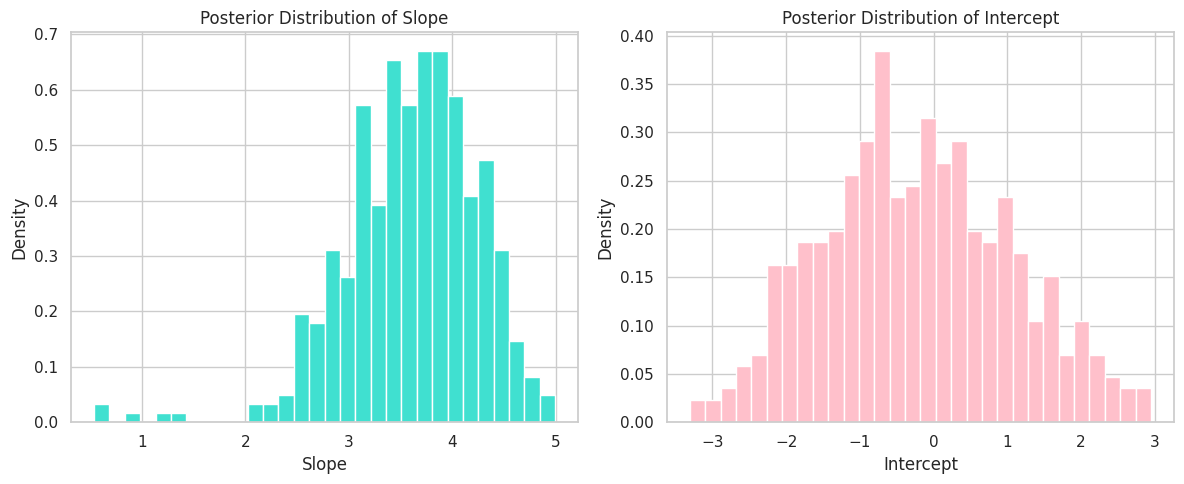

{'Slope': {'Mean': 3.6101473331499503, 'Std': 0.63771142032145},
 'Intercept': {'Mean': -0.23554119295887288, 'Std': 1.2823466883863035}}

In [ ]:
# Calculating the mean and standard deviation of the accepted samples
param_estimates = {
    'Slope': {
        'Mean': np.mean(accepted[:, 0]),
        'Std': np.std(accepted[:, 0])
    },
    'Intercept': {
        'Mean': np.mean(accepted[:, 1]),
        'Std': np.std(accepted[:, 1])
    }
}

# Plotting histograms of the accepted samples for slope and intercept
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(accepted[:, 0], bins=30, density=True, color='turquoise')
plt.title('Posterior Distribution of Slope')
plt.xlabel('Slope')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(accepted[:, 1], bins=30, density=True, color='pink')
plt.title('Posterior Distribution of Intercept')
plt.xlabel('Intercept')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

param_estimates


Monte Carlo:

In [ ]:
from sklearn.linear_model import LinearRegression

def monte_carlo_simulation(data, samples, num_simulations=1000):
    """
    Perform Monte Carlo simulations using the posterior samples obtained from Metropolis-Hastings.
    """
    simulated_slopes = []
    simulated_intercepts = []

    for i in range(num_simulations):
        # Randomly choosing a set of parameters (slope and intercept) from the samples
        sample = samples[np.random.choice(samples.shape[0])]
        slope, intercept = sample

        # Generating simulated y-values based on the chosen slope and intercept
        simulated_y = slope * data['x'] + intercept + np.random.normal(0, data['sigma_y'], len(data['x']))

        # Fitting a linear regression model to the simulated data
        model = LinearRegression()
        model.fit(data['x'].reshape(-1, 1), simulated_y)

        # Storing the results
        simulated_slopes.append(model.coef_[0])
        simulated_intercepts.append(model.intercept_)

    return simulated_slopes, simulated_intercepts

# Running the Monte Carlo simulation using the accepted samples from Metropolis-Hastings
simulated_slopes, simulated_intercepts = monte_carlo_simulation(data, accepted)

# Calculating the mean and standard deviation of the simulated slopes and intercepts
monte_carlo_results = {
    'Slope': {
        'Mean': np.mean(simulated_slopes),
        'Std': np.std(simulated_slopes)
    },
    'Intercept': {
        'Mean': np.mean(simulated_intercepts),
        'Std': np.std(simulated_intercepts)
    }
}

monte_carlo_results


{'Slope': {'Mean': 3.6229346919680525, 'Std': 0.8456527539894717},
 'Intercept': {'Mean': -0.24008544296055653, 'Std': 1.8693130664090178}}

In [ ]:
# Re-running the Metropolis-Hastings algorithm specifically for Bayesian regression
bayesian_regression_accepted, _ = metropolis_hastings(likelihood, prior, transition_model, init_params, 5000, data, acceptance)

# Analyzing the posterior distributions of the slope and intercept
# Calculating the mean and standard deviation of the accepted samples
bayesian_regression_estimates = {
    'Slope': {
        'Mean': np.mean(bayesian_regression_accepted[:, 0]),
        'Std': np.std(bayesian_regression_accepted[:, 0])
    },
    'Intercept': {
        'Mean': np.mean(bayesian_regression_accepted[:, 1]),
        'Std': np.std(bayesian_regression_accepted[:, 1])
    }
}

bayesian_regression_estimates


{'Slope': {'Mean': 3.8426661376295312, 'Std': 0.5720225035890556},
 'Intercept': {'Mean': -0.7372791671518074, 'Std': 1.233285490324525}}

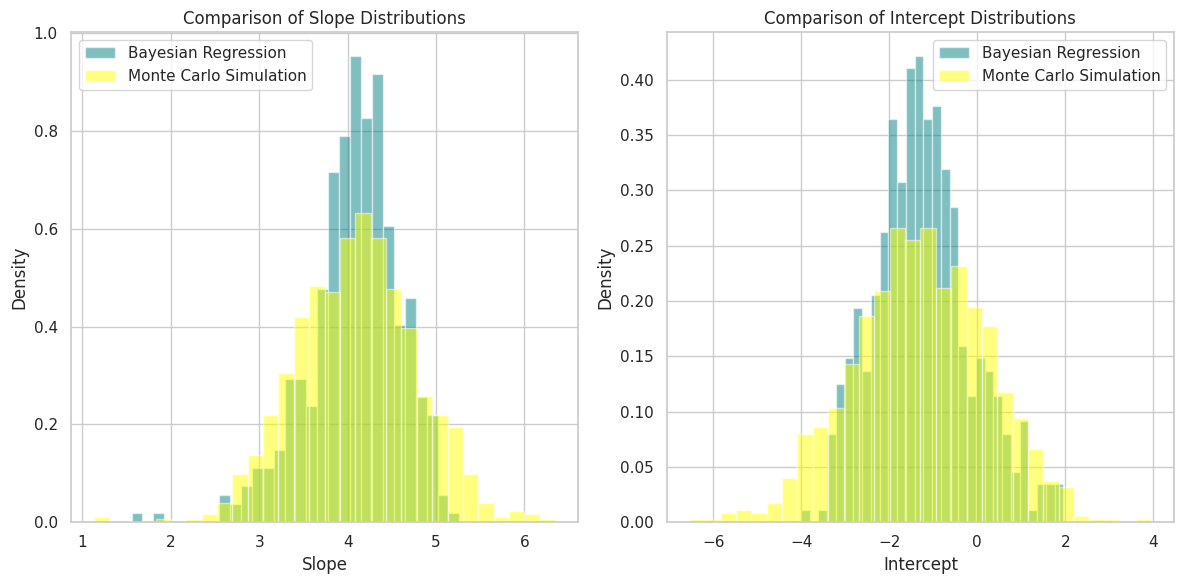

In [ ]:
# Plotting the posterior distributions from the Bayesian regression and the Monte Carlo simulation together

plt.figure(figsize=(12, 6))

# Slope distributions
plt.subplot(1, 2, 1)
plt.hist(bayesian_regression_accepted[:, 0], bins=30, density=True, alpha=0.5, label='Bayesian Regression', color='teal')
plt.hist(simulated_slopes, bins=30, density=True, alpha=0.5, label='Monte Carlo Simulation', color='yellow')
plt.title('Comparison of Slope Distributions')
plt.xlabel('Slope')
plt.ylabel('Density')
plt.legend()

# Intercept distributions
plt.subplot(1, 2, 2)
plt.hist(bayesian_regression_accepted[:, 1], bins=30, density=True, alpha=0.5, label='Bayesian Regression', color='teal')
plt.hist(simulated_intercepts, bins=30, density=True, alpha=0.5, label='Monte Carlo Simulation', color='yellow')
plt.title('Comparison of Intercept Distributions')
plt.xlabel('Intercept')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


###Bayesian Regression

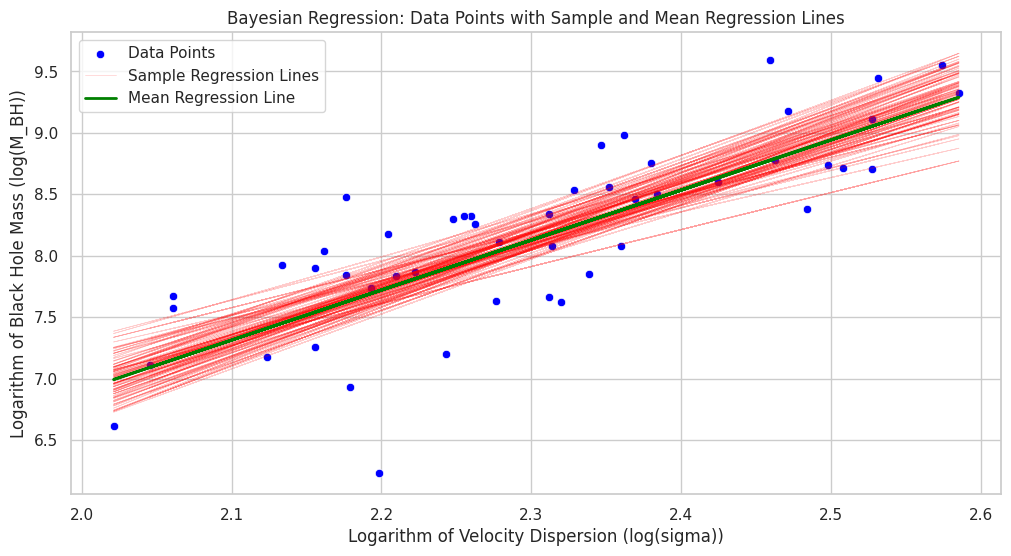

In [ ]:
# Calculating the mean slope and intercept from the Bayesian regression samples
mean_slope = np.mean(bayesian_regression_accepted[:, 0])
mean_intercept = np.mean(bayesian_regression_accepted[:, 1])

# Replotting with updated legend to include all elements

plt.figure(figsize=(12, 6))

# Scatter plot of the data points
sns.scatterplot(x='log_sigma', y='log_M_BH', data=data1, label='Data Points', color='blue')

# Drawing a sample of regression lines from the Bayesian regression
for i in range(100):  # Drawing 100 sample lines
    sample = bayesian_regression_accepted[np.random.choice(bayesian_regression_accepted.shape[0])]
    slope_sample, intercept_sample = sample
    plt.plot(data1['log_sigma'], slope_sample * data1['log_sigma'] + intercept_sample,
             color='red', alpha=0.2, linewidth=0.5, label='Sample Regression Lines' if i == 0 else "")

# Plotting the mean regression line
plt.plot(data1['log_sigma'], mean_slope * data1['log_sigma'] + mean_intercept,
         color='green', label='Mean Regression Line', linewidth=2)

# Adding titles, labels, and legend
plt.title('Bayesian Regression: Data Points with Sample and Mean Regression Lines')
plt.xlabel('Logarithm of Velocity Dispersion (log(sigma))')
plt.ylabel('Logarithm of Black Hole Mass (log(M_BH))')
plt.legend()

plt.show()


The line fits well on data points.

###T-test

In [ ]:
from scipy.stats import ttest_ind

# T-test between 'sigma' and 'M_BH'
t_statistic, p_value = ttest_ind(data1['sigma'], data1['M_BH'])

t_statistic, p_value


(-4.005843343689243, 0.00012193852764440435)

###Chi-square test

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# Binning the 'sigma' and 'M_BH' variables into categories
# For simplicity, we'll use quartiles to create the bins

sigma_bins = pd.qcut(data1['sigma'], 4, labels=False)
m_bh_bins = pd.qcut(data1['M_BH'], 4, labels=False)

# Creating a contingency table
contingency_table = pd.crosstab(sigma_bins, m_bh_bins)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p, dof, expected

(36.00208445400753,
 3.961283680801798e-05,
 9,
 array([[3.44897959, 3.18367347, 3.18367347, 3.18367347],
        [3.44897959, 3.18367347, 3.18367347, 3.18367347],
        [2.91836735, 2.69387755, 2.69387755, 2.69387755],
        [3.18367347, 2.93877551, 2.93877551, 2.93877551]]))

##Conclusions

The project's application of Bayesian regression to the M-sigma relation has not only underscored a strong correlation between black hole mass and stellar velocity dispersion but also offered a personal takeaway in the realm of astrophysical data analysis. Working on this project highlighted the profound impact of Bayesian methods in dealing with uncertainties, a common challenge in astronomical research. The experience has deepened my appreciation for probabilistic modeling and its ability to provide more comprehensive insights, especially when interpreting complex and nuanced data typical in astrophysics.